# Verdeeldheid in Nederland

In [1]:
# Import packages

import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase

import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

import warnings
from shapely.errors import ShapelyDeprecationWarning

/var/folders/ml/tgl_vvsx7ln3q81h8trtk4j00000gn/T/ipykernel_90915/571529540.py:27: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



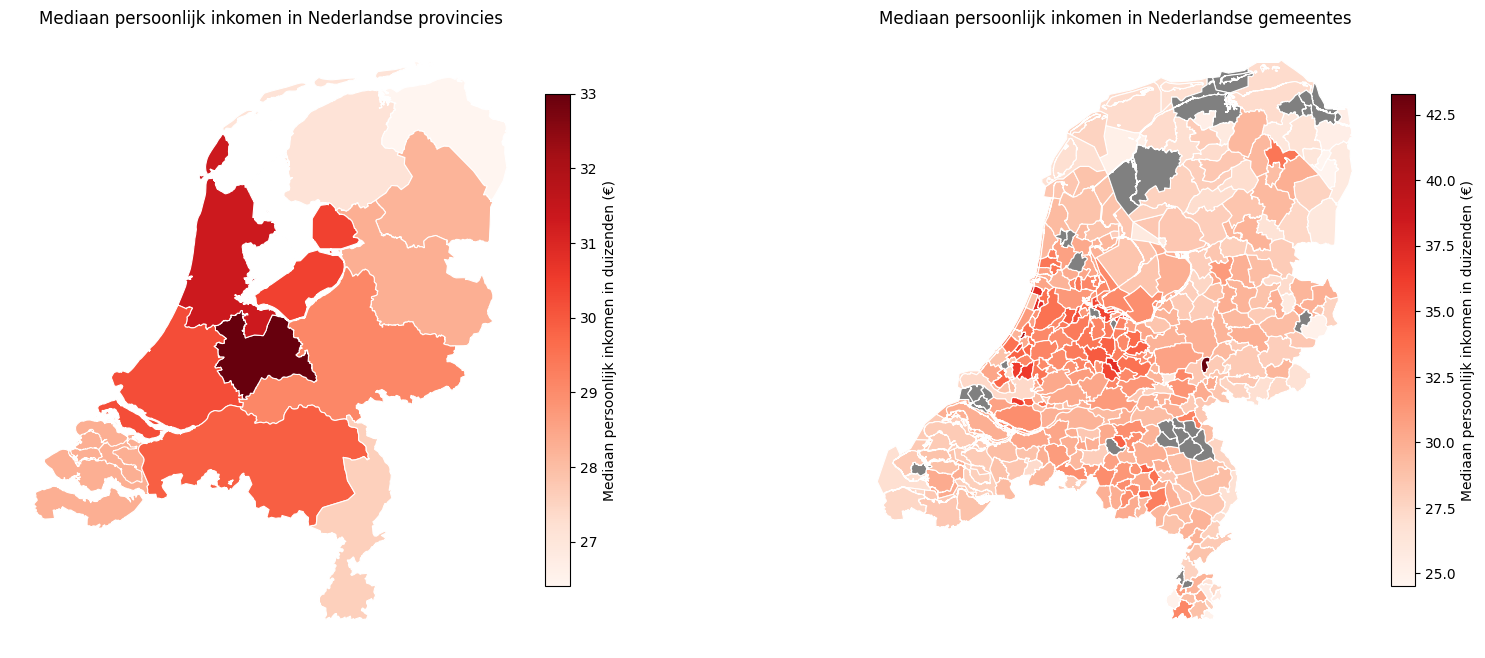

In [2]:
# Plot Mediaan persoonlijk inkomen in Nederlandse provincies & gemeentes

# Suppress specific warnings
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

# First plot
gemeenten_shapefile = 'Provincies.shp'
gdf = gpd.read_file(gemeenten_shapefile)

dataset = pd.read_csv('Inkomen_van_personen__persoonskenmerken.csv', sep=',', thousands='.')[0:12]
dataset['Mediaan persoonlijk inkomen'] = dataset['Mediaan persoonlijk inkomen'].str.replace(',', '.').astype(float)

merged = gdf.merge(dataset, how='left', left_on='OMSCHRIJVI', right_on='Regio\'s')

# Second plot
gemeenten_shapefile2 = 'gemeente_2020_v3.shp'
gdf2 = gpd.read_file(gemeenten_shapefile2)

dataset2 = pd.read_csv('Inkomen_van_personen__persoonskenmerken.csv', sep=',', thousands='.')
dataset2['Mediaan persoonlijk inkomen'] = dataset2['Mediaan persoonlijk inkomen'].str.replace(',', '.').astype(float)

merged2 = gdf2.merge(dataset2, how='left', left_on='GM_NAAM', right_on='Regio\'s')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

cmap = plt.cm.get_cmap('Reds')
norm1 = Normalize(vmin=merged['Mediaan persoonlijk inkomen'].min(), vmax=merged['Mediaan persoonlijk inkomen'].max())
norm2 = Normalize(vmin=merged2['Mediaan persoonlijk inkomen'].min(), vmax=merged2['Mediaan persoonlijk inkomen'].max())

# Plot the first map
merged.plot(column='Mediaan persoonlijk inkomen', cmap=cmap, linewidth=0.8, ax=axes[0], edgecolor='1.0', legend=False, missing_kwds={'color': 'gray'})
axes[0].axis('off')
axes[0].set_title('Mediaan persoonlijk inkomen in Nederlandse provincies')

# Add color bar for the first plot
sm1 = plt.cm.ScalarMappable(cmap=cmap, norm=norm1)
sm1.set_array([])
cbar1 = fig.colorbar(sm1, ax=axes[0], orientation='vertical', shrink=0.8, pad=0.02)
cbar1.set_label('Mediaan persoonlijk inkomen in duizenden (€)')

# Plot the second map
merged2.plot(column='Mediaan persoonlijk inkomen', cmap=cmap, linewidth=0.8, ax=axes[1], edgecolor='1.0', legend=False, missing_kwds={'color': 'gray'})
axes[1].axis('off')
axes[1].set_title('Mediaan persoonlijk inkomen in Nederlandse gemeentes')

# Add color bar for the second plot
sm2 = plt.cm.ScalarMappable(cmap=cmap, norm=norm2)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=axes[1], orientation='vertical', shrink=0.8, pad=0.02)
cbar2.set_label('Mediaan persoonlijk inkomen in duizenden (€)')

plt.show()

/var/folders/ml/tgl_vvsx7ln3q81h8trtk4j00000gn/T/ipykernel_90915/2633797163.py:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



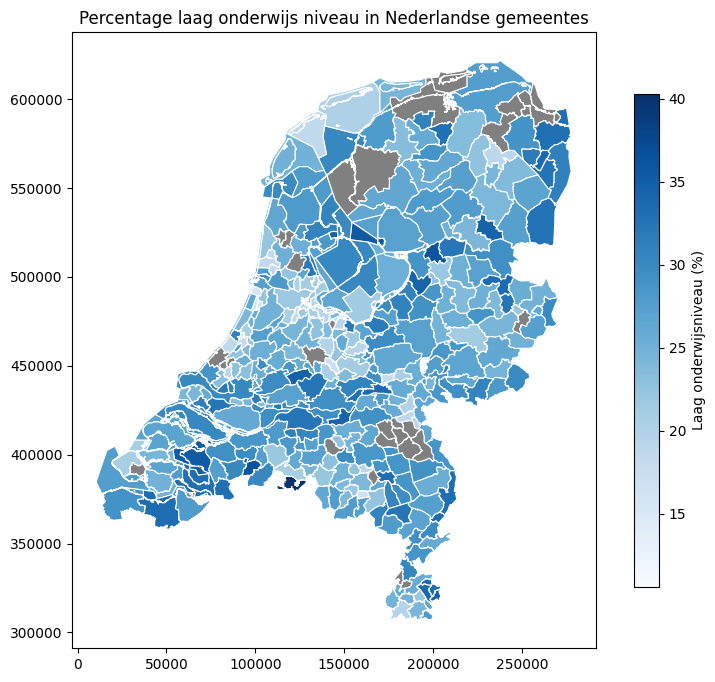

/var/folders/ml/tgl_vvsx7ln3q81h8trtk4j00000gn/T/ipykernel_90915/2633797163.py:28: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



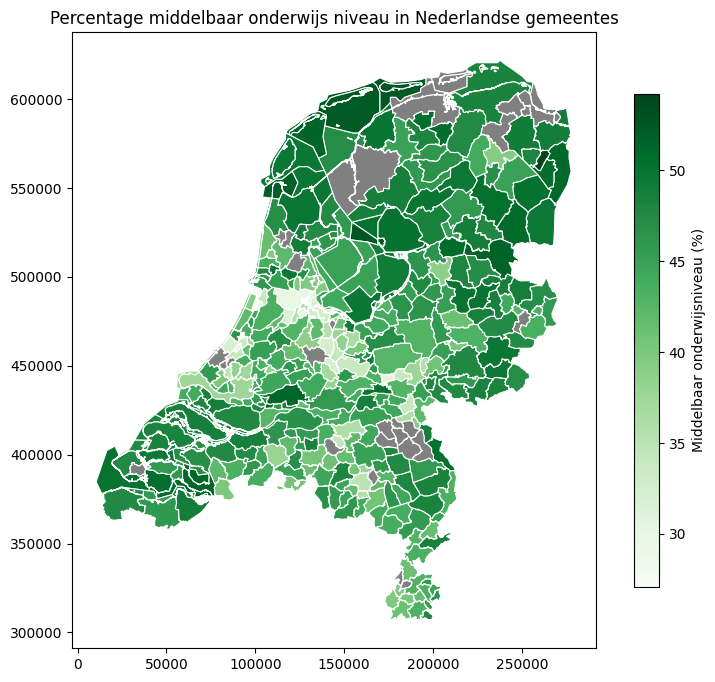

/var/folders/ml/tgl_vvsx7ln3q81h8trtk4j00000gn/T/ipykernel_90915/2633797163.py:44: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



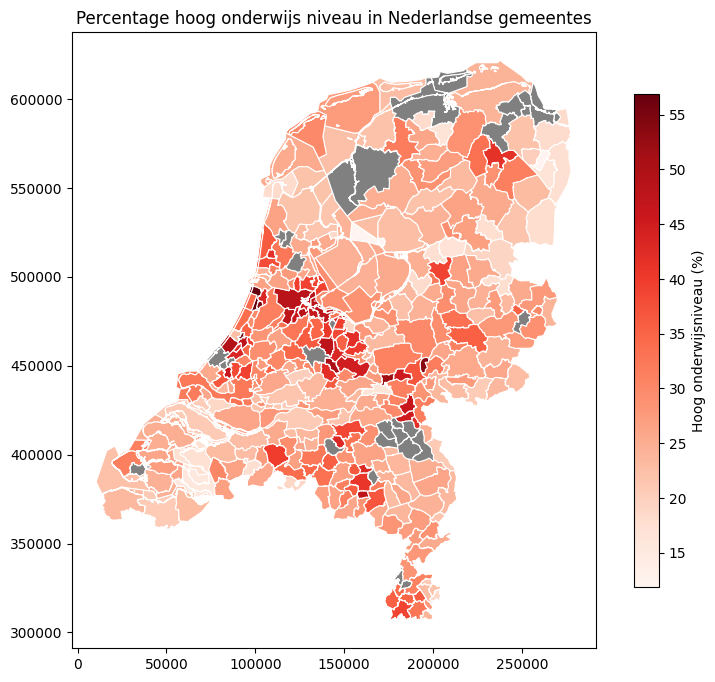

In [3]:
# Plot Hoogst behaalde onderwijsniveau in Nederlandse gemeentes

gemeenten_shapefile = 'gemeente_2020_v3.shp'

gdf = gpd.read_file(gemeenten_shapefile)

dataset = pd.read_csv('hoogstbehaald_onderwijsniveau_schoongemaakt.csv', sep=',')
merged = gdf.merge(dataset, how='left', left_on='GM_NAAM', right_on='Regio\'s')

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

cmap = plt.cm.get_cmap('Blues')
norm = Normalize(vmin=merged['Laag onderwijsniveau (%)'].min(), vmax=merged['Laag onderwijsniveau (%)'].max())

merged.plot(column='Laag onderwijsniveau (%)', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='1.0', legend=False, missing_kwds={'color': 'gray'})

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label('Laag onderwijsniveau (%)')

ax.set_title('Percentage laag onderwijs niveau in Nederlandse gemeentes')

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

cmap = plt.cm.get_cmap('Greens')
norm = Normalize(vmin=merged['Middelbaar onderwijsniveau (%)'].min(), vmax=merged['Middelbaar onderwijsniveau (%)'].max())

merged.plot(column='Middelbaar onderwijsniveau (%)', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='1.0', legend=False, missing_kwds={'color': 'gray'})

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label('Middelbaar onderwijsniveau (%)')

ax.set_title('Percentage middelbaar onderwijs niveau in Nederlandse gemeentes')

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

cmap = plt.cm.get_cmap('Reds')
norm = Normalize(vmin=merged['Hoog onderwijsniveau (%)'].min(), vmax=merged['Hoog onderwijsniveau (%)'].max())

merged.plot(column='Hoog onderwijsniveau (%)', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='1.0', legend=False, missing_kwds={'color': 'gray'})

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
cbar.set_label('Hoog onderwijsniveau (%)')

ax.set_title('Percentage hoog onderwijs niveau in Nederlandse gemeentes')

plt.show()

In [4]:
# Plot Vestigingen van bedrijven in Nederlandse gemeentes

df = pd.read_csv('vestigingen_van_bedrijven_schoongemaakt.csv')

df['company_qcut'] = pd.qcut(df['A-U Alle economische activiteiten'], q=3, labels=['Low', 'Middle', 'High'])
df['I Horeca_qcut'] = pd.qcut(df['I Horeca'], q=3, labels=['Low', 'Middle', 'High'])
df['A Landbouw, bosbouw en visserij_qcut'] = pd.qcut(df['A Landbouw, bosbouw en visserij'], q=3, labels=['Low', 'Middle', 'High'])
df['C Industrie_qcut'] = pd.qcut(df['C Industrie'], q=3, labels=['Low', 'Middle', 'High'])
df['F Bouwnijverheid_qcut'] = pd.qcut(df['F Bouwnijverheid'], q=3, labels=['Low', 'Middle', 'High'])
df['G Handel_qcut'] = pd.qcut(df['G Handel'], q=3, labels=['Low', 'Middle', 'High'])
df['H Vervoer en opslag_qcut'] = pd.qcut(df['H Vervoer en opslag'], q=3, labels=['Low', 'Middle', 'High'])

df = df.sort_values("Regio's")

num_groups = 5
df['group'] = pd.qcut(range(len(df)), num_groups, labels=False)


def create_plot(group):
    group_df = df[df['group'] == group]
    dimensions = [
        {'label': 'Gemeente', 'values': group_df["Regio's"], 'categoryorder': 'category ascending', 'ticktext': [_ for _ in group_df["I Horeca"]]},
        {'label': 'Landbouw', 'values': group_df["A Landbouw, bosbouw en visserij_qcut"], 'categoryorder': 'array', 'categoryarray': ['High', 'Middle', 'Low']},
        {'label': 'Horeca', 'values': group_df["I Horeca_qcut"], 'categoryorder': 'array', 'categoryarray': ['High', 'Middle', 'Low']},
        {'label': 'Industrie', 'values': group_df["C Industrie_qcut"], 'categoryorder': 'array', 'categoryarray': ['High', 'Middle', 'Low']},
        {'label': 'Bouw', 'values': group_df["F Bouwnijverheid_qcut"], 'categoryorder': 'array', 'categoryarray': ['High', 'Middle', 'Low']},
        {'label': 'Handel', 'values': group_df["G Handel_qcut"], 'categoryorder': 'array', 'categoryarray': ['High', 'Middle', 'Low']},
        {'label': 'Vervoer', 'values': group_df["H Vervoer en opslag_qcut"], 'categoryorder': 'array', 'categoryarray': ['High', 'Middle', 'Low']},
        {'label': 'Totaal bedrijven', 'values': group_df['company_qcut'], 'categoryorder': 'array', 'categoryarray': ['High', 'Middle', 'Low']}
    ]
    colors = {'Low': 0, 'Middle': 0.5, 'High': 1}
    # color_scale = [[0, '#A8E0B7'], [0.5, '#73C088'], [1, '#397D54']]
    color_scale = [[0, 'cornflowerblue'], [0.5, '#73C088'], [1, 'lightcoral']]
    color_vals = group_df['company_qcut'].map(colors)
    fig = go.Figure(go.Parcats(
        dimensions=dimensions,
        line={'color': color_vals, 'colorscale': color_scale},
        labelfont={'size': 15},
        tickfont={'size': 12},
        # dimensiondefaults={'ticktext': ['Low', 'Middle', 'High']}
    ))
    
    
    
    
    
    fig.update_layout(
        # title=f'Bedrijven per gemeente - Group {group + 1}',
        height=900,
        title={
        'text': f'Bedrijven per gemeente - Groep {group + 1}',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
        },
        font=dict(
            family="Courier New, monospace",
            size=20,
            # color="#235D3A"
            color='black' 
        ),
        margin=dict(l=150, r=100, t=150, b=50),
        plot_bgcolor='red',
        paper_bgcolor='lavender',
        bargap=1,
    )
    
    return fig

for group in range(num_groups):
    fig = create_plot(group)
    fig.show()

# Misdaden

Hieronder de plot van misdaden.

In [5]:
%run misdaden.ipynb

# Visualisaties die nog volgen:

- Groenvoorzieningen (bubble plot)

*Een visualisatie van hoe het groen in Nederland verdeeld is. Door gebruik te maken van een bubble plot kun je goed zien waar met name het groen in Nederland zit. Opmaak zal in kleuren van de natuur zijn.*

- Woontevredenheid, in percentage (staafdiagram per provincie)

*Een visualisatie van de woontevredenheid per provincie. Gezien de hoeveelheid gemeentes en de over het algemeen zelfde mening per provincie is het beter om de woontevredenheid per provincie te bekijken en te visualiseren. Doordat de woontevredenheid binair is, laat een staafdiagram eenvoudig zien hoe de provincies naar de woonomgeving kijken.*

- Infrastructuur, wegennetwerk fiets + auto (kaart)

*Een visualisatie van het wegennetwerk in Nederland. Door gebruik te maken van een kaart met kleuren waarbij een donkere kleur staat voor meer wegen, is eennvoudig te zien hoe goed bereikbaar de gemeentes in Nederland zijn.*

